In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
df_y=pd.read_csv('C:/Users/Mounica/Downloads/social media influencers - youtube.csv')

In [321]:
df_y.head(2)

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN


In [322]:
df_y.isnull().sum()

youtuber name         0
channel name          0
Category            277
Subscribers           0
Audience Country    161
avg views             0
avg likes            38
avg comments        209
dtype: int64

In [323]:
df_y['Subscribers'].str[-1].value_counts()

M    1000
Name: Subscribers, dtype: int64

In [324]:
df_y['avg views'] = pd.to_numeric(df_y['avg views'], errors='coerce')
df_y['avg likes'] = pd.to_numeric(df_y['avg likes'], errors='coerce')
df_y['avg comments'] = pd.to_numeric(df_y['avg comments'], errors='coerce')

# Calculate engagement rate
df_y['Engagement_Rate'] = ((df_y['avg likes'].fillna(0) + df_y['avg comments'].fillna(0))) / (df_y['avg views'].fillna(1)) * 100

# Display the DataFrame with the added column
df_y

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,Engagement_Rate
0,tseries,T-Series,Music & Dance,212.1M,India,NaN,NaN,290.0,29000.0
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,NaN,NaN,NaN,0.0
2,setindia,SET India,NaN,130.4M,India,NaN,314.0,21.0,33500.0
3,PewDiePie,PewDiePie,Animation,111.4M,United States,NaN,NaN,NaN,0.0
4,MrBeast6000,MrBeast,Video games,92.5M,United States,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9.2M,Brazil,NaN,NaN,NaN,0.0
996,EL GATO,EL GATO,Toys,9.2M,Brazil,NaN,NaN,636.0,63600.0
997,CinemaSins,CinemaSins,Movies,9.2M,United States,NaN,NaN,874.0,87400.0
998,CricketICC,ICC,Sports,9.2M,India,NaN,854.0,58.0,91200.0


In [325]:
import re

def convert(x):
    if isinstance(x, str):
        return re.findall('\d+\.?\d*', x)
    else:
        return [str(x)]




In [326]:
def change(df,list1):
    df_y = df.copy()
    for i in list1:
        df_y['new'+i]=df_y[i].apply(convert)
        df_y['new'+i]=df_y['new'+i].apply(lambda x: "".join(x) if isinstance(x, list) else x)
        df_y['new'+i]=pd.to_numeric(df_y['new'+i]) 
        df_y['new'+i]=np.where(['M' in j for j in df_y[i]],df_y['new'+i]*1000000,
                             np.where(['K' in j1 for j1 in df_y[i]],df_y['new'+i]*1000,df_y['new'+i]))
    return df_y


In [329]:
ly=['Subscribers']

In [330]:
change(df_y,ly)

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,Engagement_Rate,newSubscribers
0,tseries,T-Series,Music & Dance,212.1M,India,NaN,NaN,290.0,29000.0,212100000.0
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,NaN,NaN,NaN,0.0,132100000.0
2,setindia,SET India,NaN,130.4M,India,NaN,314.0,21.0,33500.0,130400000.0
3,PewDiePie,PewDiePie,Animation,111.4M,United States,NaN,NaN,NaN,0.0,111400000.0
4,MrBeast6000,MrBeast,Video games,92.5M,United States,NaN,NaN,NaN,0.0,92500000.0
...,...,...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9.2M,Brazil,NaN,NaN,NaN,0.0,9200000.0
996,EL GATO,EL GATO,Toys,9.2M,Brazil,NaN,NaN,636.0,63600.0,9200000.0
997,CinemaSins,CinemaSins,Movies,9.2M,United States,NaN,NaN,874.0,87400.0,9200000.0
998,CricketICC,ICC,Sports,9.2M,India,NaN,854.0,58.0,91200.0,9200000.0


In [332]:
#df_y.sort_values(by='newSubscribers',ascending=False,ignore_index=True).iloc[0:10,[1,2]]

# Engagement rate : the Percentage of Followers who really engages with the content posted by Influencers
Why ER is so Important?
1-good ER means your content is making an impact on audience(they really like you)
2- The higher the engagement ,the more likely it is that the content will be boosted in the newsfeed and attracting more eyes.

ER=(Engagement Average/total Followers)*100

In [333]:
pallete=['red','green','yellow','salmon','cyan','blue','orange']

In [334]:
def plot(df):
    plt.figure(figsize=(8,6))
    plt.xlabel('number of times category occured')
    plt.ylabel('Category')
    df['Category'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)

In [335]:
df_y.drop_duplicates(subset=['channel name'],inplace=True)

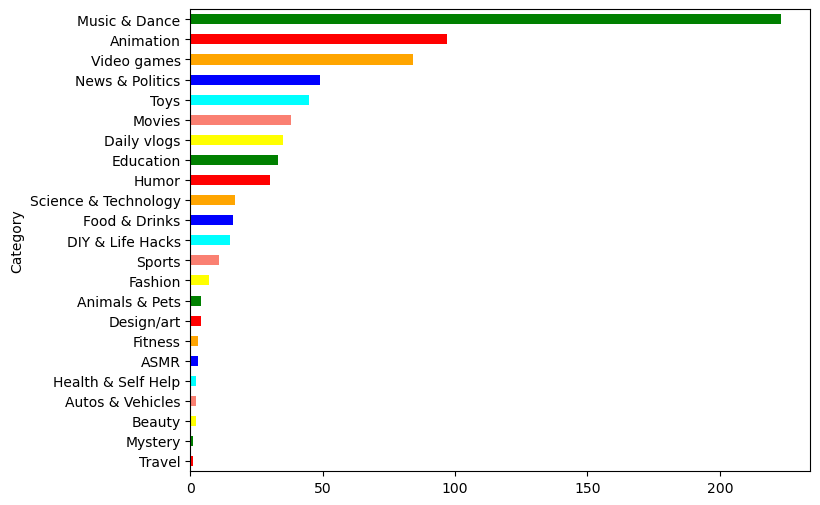

In [336]:
plot(df_y)

# Decide That where you want to make ads

In [337]:
def plot_c(df):
    plt.figure(figsize=(10,8))
    plt.xlabel('number of times category occured')
    df['Audience Country'].value_counts().sort_values().plot.barh(color=pallete)

# TOP consumer countries of the influencers content on YOUTUBE

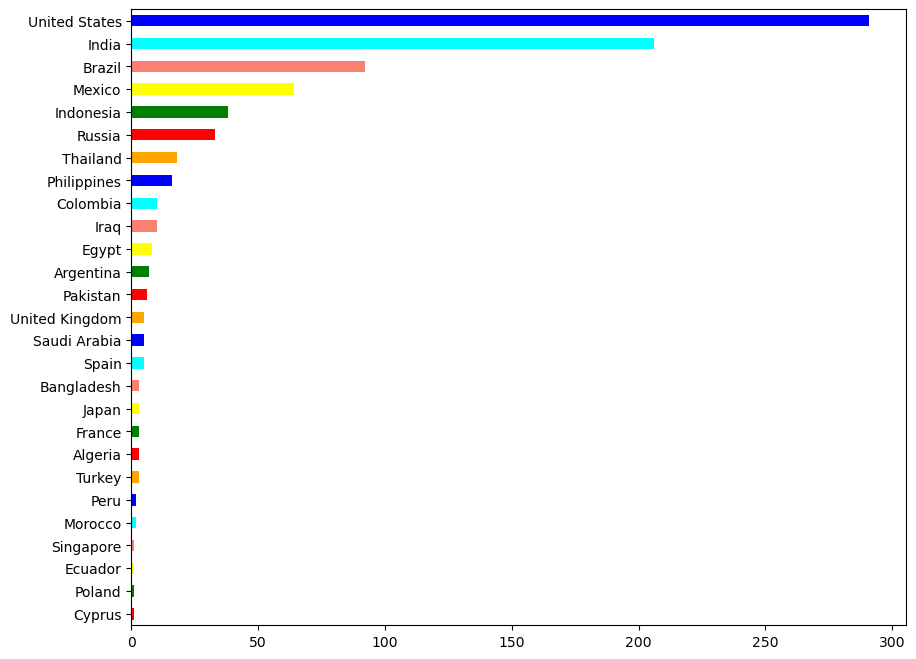

In [338]:
plot_c(df_y)

# (TARGET COUNTRY FOR BUISNESS)Checking the demand for categories by Country wise

In [339]:
def demand(data,category):
    return data[data['Category']==category]['Audience Country'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)

<Axes: >

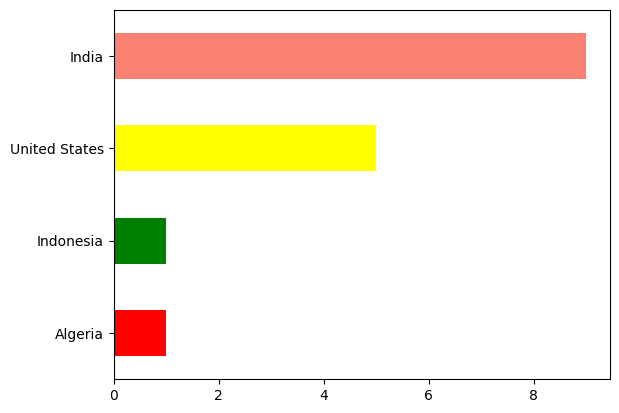

In [340]:
demand(df_y,'Education')

In [341]:
df_y.iloc[0:10,[1,2,3]]
# youtube dataset is already sorted

,channel name,Category,Subscribers
0,T-Series,Music & Dance,212.1M
1,Cocomelon - Nursery Rhymes,Education,132.1M
2,SET India,NaN,130.4M
3,PewDiePie,Animation,111.4M
4,MrBeast,Video games,92.5M
5,✿ Kids Diana Show,Animation,92.4M
6,Like Nastya,Animation,90.1M
7,WWE,Video games,86.9M
8,Zee Music Company,Music & Dance,82.7M
9,Vlad and Niki,Toys,80.4M


In [342]:
df_y.head(3)

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,Engagement_Rate
0,tseries,T-Series,Music & Dance,212.1M,India,NaN,NaN,290.0,29000.0
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,NaN,NaN,NaN,0.0
2,setindia,SET India,NaN,130.4M,India,NaN,314.0,21.0,33500.0


In [343]:
df_y.isnull().sum()

youtuber name         0
channel name          0
Category            276
Subscribers           0
Audience Country    161
avg views           979
avg likes           787
avg comments        473
Engagement_Rate      18
dtype: int64

In [344]:
#Due to nan values we have to remove some data .but in reality you can collect this data easily


df_y.dropna(axis=0,how='any',subset=['avg likes','avg comments']).isnull().sum()

youtuber name         0
channel name          0
Category             68
Subscribers           0
Audience Country      0
avg views           157
avg likes             0
avg comments          0
Engagement_Rate       0
dtype: int64

In [345]:
df_y.dropna(axis=0,how='any',subset=['avg likes','avg comments'],inplace=True)

In [346]:
df_y

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,Engagement_Rate
2,setindia,SET India,NaN,130.4M,India,NaN,314.0,21.0,33500.0
15,sabtv,Sony SAB,Movies,64.9M,India,NaN,899.0,27.0,92600.0
18,filmigaane,Shemaroo Filmi Gaane,Music & Dance,59.2M,India,NaN,631.0,33.0,66400.0
24,colorstv,Colors TV,NaN,51.2M,India,NaN,290.0,8.0,29800.0
25,aajtaktv,Aaj Tak,News & Politics,50.9M,India,NaN,128.0,10.0,13800.0
...,...,...,...,...,...,...,...,...,...
972,RSVDO,rsfriends,Music & Dance,9.3M,Thailand,NaN,118.0,12.0,13000.0
983,Rayito,Rayito,NaN,9.3M,Mexico,NaN,306.0,33.0,33900.0
991,chetakvideo,Chetak,Music & Dance,9.2M,India,NaN,308.0,10.0,31800.0
994,Tom Slime,Tom Slime,NaN,9.2M,United States,NaN,206.0,10.0,21600.0


In [347]:
df_y[df_y['Audience Country']=='Spain']['Category'].value_counts()

Series([], Name: Category, dtype: int64)

In [348]:
df_y.head(2)

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,Engagement_Rate
2,setindia,SET India,NaN,130.4M,India,NaN,314.0,21.0,33500.0
15,sabtv,Sony SAB,Movies,64.9M,India,NaN,899.0,27.0,92600.0


In [349]:
df_y.columns

Index(['youtuber name', 'channel name', 'Category', 'Subscribers',
       'Audience Country', 'avg views', 'avg likes', 'avg comments',
       'Engagement_Rate'],
      dtype='object')

In [350]:
#df_y['newSubscribers']=df_y['newSubscribers']/1000000

In [351]:
#df_y.drop(labels=['avg views','newavg views'],axis=1,inplace=True)

In [356]:
#df_y['newSubscribers'].describe()

In [357]:
df_y.head(10)

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,Engagement_Rate
2,setindia,SET India,NaN,130.4M,India,NaN,314.0,21.0,33500.0
15,sabtv,Sony SAB,Movies,64.9M,India,NaN,899.0,27.0,92600.0
18,filmigaane,Shemaroo Filmi Gaane,Music & Dance,59.2M,India,NaN,631.0,33.0,66400.0
24,colorstv,Colors TV,NaN,51.2M,India,NaN,290.0,8.0,29800.0
25,aajtaktv,Aaj Tak,News & Politics,50.9M,India,NaN,128.0,10.0,13800.0
31,Badabun,Badabun,NaN,45.5M,Mexico,NaN,129.0,14.0,14300.0
42,sonymusicindiaVEVO,SonyMusicIndiaVEVO,Music & Dance,41.2M,India,NaN,136.0,19.0,15500.0
46,ABSCBNOnline,ABS-CBN Entertainment,NaN,38.8M,Philippines,NaN,26.0,1.0,2700.0
50,TheEllenShow,TheEllenShow,NaN,38.2M,United States,NaN,944.0,54.0,99800.0
54,venus,Ishtar Music,Music & Dance,36.5M,India,NaN,790.0,59.0,84900.0
